In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras

from sklearn.decomposition import PCA

np.random.seed(101)

# sns.set()
plt.rcParams['figure.figsize'] = (11.0, 8.0)

In [2]:
# データ読み込み
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

(5923, 784)

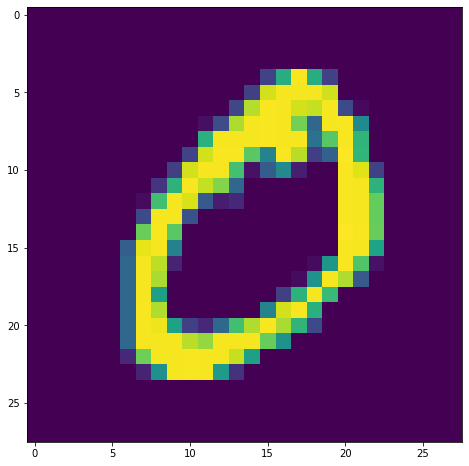

In [23]:
plt.imshow(x_train[y_train==0][0])

num_zeros = x_train[y_train==0].reshape(-1, 784)

num_zeros.shape

In [24]:
# pca = PCA(n_components=2)
# pca.fit(num_zeros)
# transformed = pca.transform(num_zeros)

comp_items = [5, 10, 20, 30]
cumsum_explained = np.zeros((10, len(comp_items)))
for i, n_comp in zip(range(len(comp_items)), comp_items):
    for num in range(1):
        pca = PCA(n_components = n_comp)  # 主成分分析オブジェクトの作成
        pca.fit(num_zeros)                       # 主成分分析の実行
        transformed = pca.transform(num_zeros)   # データに対して削減後のベクトルを生成
        E = pca.explained_variance_ratio_        # 寄与率
        cumsum_explained[num, i] = np.cumsum(E)[::-1][0] # 累積寄与率

In [25]:
print("|　label　|explained n_comp:5|explained n_comp:10|explained n_comp:20|explained n_comp:30|")
print("|:-----:|:-----:|:-----:|:-----:|:-----:|")
for i in range(1):
    print("|%d|%.1f％|%.1f％|%.1f％|%.1f％|"%(i, cumsum_explained[i,0]*100, cumsum_explained[i,1]*100, cumsum_explained[i,2]*100, cumsum_explained[i,3]*100))

|　label　|explained n_comp:5|explained n_comp:10|explained n_comp:20|explained n_comp:30|
|:-----:|:-----:|:-----:|:-----:|:-----:|
|0|48.6％|62.6％|75.8％|81.9％|


|　label　|explained n_comp:5|explained n_comp:10|explained n_comp:20|explained n_comp:30|
|:-----:|:-----:|:-----:|:-----:|:-----:|
|0|48.6％|62.6％|75.8％|81.9％|

In [ ]:
n_comp = 30

fig = plt.figure(figsize=(10, 12))
for i in range(n_comp):
    plot_digits(pca.components_[i], size, 6, 5, i+1, "comp:%d exp:%.3f" % (i+1, E[0]), fontsize=9)